## Final Project Submission

Please fill out:
* Student name: Minna Fingerhood
* Student pace: full time
* Scheduled project review date/time: 
* Instructor name: Fangfang
* Blog post URL:


In [1]:
# Your code here - remember to use markdown cells for comments as well!

In [2]:
#how does date affect the price of houses?
#heatmap of lat/long at house prices?
#how does bathroom and square footage -- high correlation demonstrated by heatmap 

assingment: 
    - You'll clean, explore, and model this dataset with a multivariate linear regression to predict the sale price of houses as accurately as possible. 

questions to keep in mind:

    -"how did you pick the question(s) that you did?"
    -"why are these questions important from a business perspective?"
    -"how did you decide on the data cleaning options you performed?"
    -"why did you choose a given method or library?"
    -"why did you select those visualizations and what did you learn from each of them?"
    -"why did you pick those features as predictors?"
    -"how would you interpret the results?"
    -"how confident are you in the predictive quality of the results?"
    -"what are some of the things that could cause the results to be wrong?"

In [3]:
#import data and packages
import pandas as pd
import seaborn as sns
import numpy as np 
import matplotlib.pyplot as plt 
import statsmodels.formula.api as smf
import sklearn as sk
%matplotlib inline
sns.set()


In [4]:
import functions as f

In [5]:
df = pd.read_csv('kc_house_data.csv')

In [6]:
#check & inspect duplicates
df[df.id.duplicated(keep=False)]
#duplicates are a result of the same house being sold another time... Therefore do not need to delete 

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
93,6021501535,7/25/2014,430000.0,3,1.50,1580,5000,1.0,0.0,0.0,...,8,1290,290.0,1939,0.0,98117,47.6870,-122.386,1570,4500
94,6021501535,12/23/2014,700000.0,3,1.50,1580,5000,1.0,0.0,0.0,...,8,1290,290.0,1939,0.0,98117,47.6870,-122.386,1570,4500
313,4139480200,6/18/2014,1380000.0,4,3.25,4290,12103,1.0,0.0,3.0,...,11,2690,1600.0,1997,0.0,98006,47.5503,-122.102,3860,11244
314,4139480200,12/9/2014,1400000.0,4,3.25,4290,12103,1.0,0.0,3.0,...,11,2690,1600.0,1997,0.0,98006,47.5503,-122.102,3860,11244
324,7520000520,9/5/2014,232000.0,2,1.00,1240,12092,1.0,NaN,0.0,...,6,960,280.0,1922,1984.0,98146,47.4957,-122.352,1820,7460
325,7520000520,3/11/2015,240500.0,2,1.00,1240,12092,1.0,0.0,0.0,...,6,960,280.0,1922,1984.0,98146,47.4957,-122.352,1820,7460
345,3969300030,7/23/2014,165000.0,4,1.00,1000,7134,1.0,0.0,0.0,...,6,1000,0.0,1943,0.0,98178,47.4897,-122.240,1020,7138
346,3969300030,12/29/2014,239900.0,4,1.00,1000,7134,1.0,0.0,0.0,...,6,1000,0.0,1943,NaN,98178,47.4897,-122.240,1020,7138
371,2231500030,10/1/2014,315000.0,4,2.25,2180,10754,1.0,NaN,0.0,...,7,1100,1080.0,1954,0.0,98133,47.7711,-122.341,1810,6929
372,2231500030,3/24/2015,530000.0,4,2.25,2180,10754,1.0,0.0,0.0,...,7,1100,1080.0,1954,0.0,98133,47.7711,-122.341,1810,6929


In [7]:
df['yr_renovated'].describe()

count    17755.000000
mean        83.636778
std        399.946414
min          0.000000
25%          0.000000
50%          0.000000
75%          0.000000
max       2015.000000
Name: yr_renovated, dtype: float64

In [26]:
df = f.clean_data(df)

In [27]:
c = ['price', 'sqft_above', 'sqft_basement', 'sqft_living', 'sqft_living15', 'sqft_lot', 'sqft_lot15']
transformed_df = f.log_transform(df, c)

In [32]:
transformed_df = f.remove_outliers(transformed_df, ['bedrooms', 'bathrooms', 'long'])

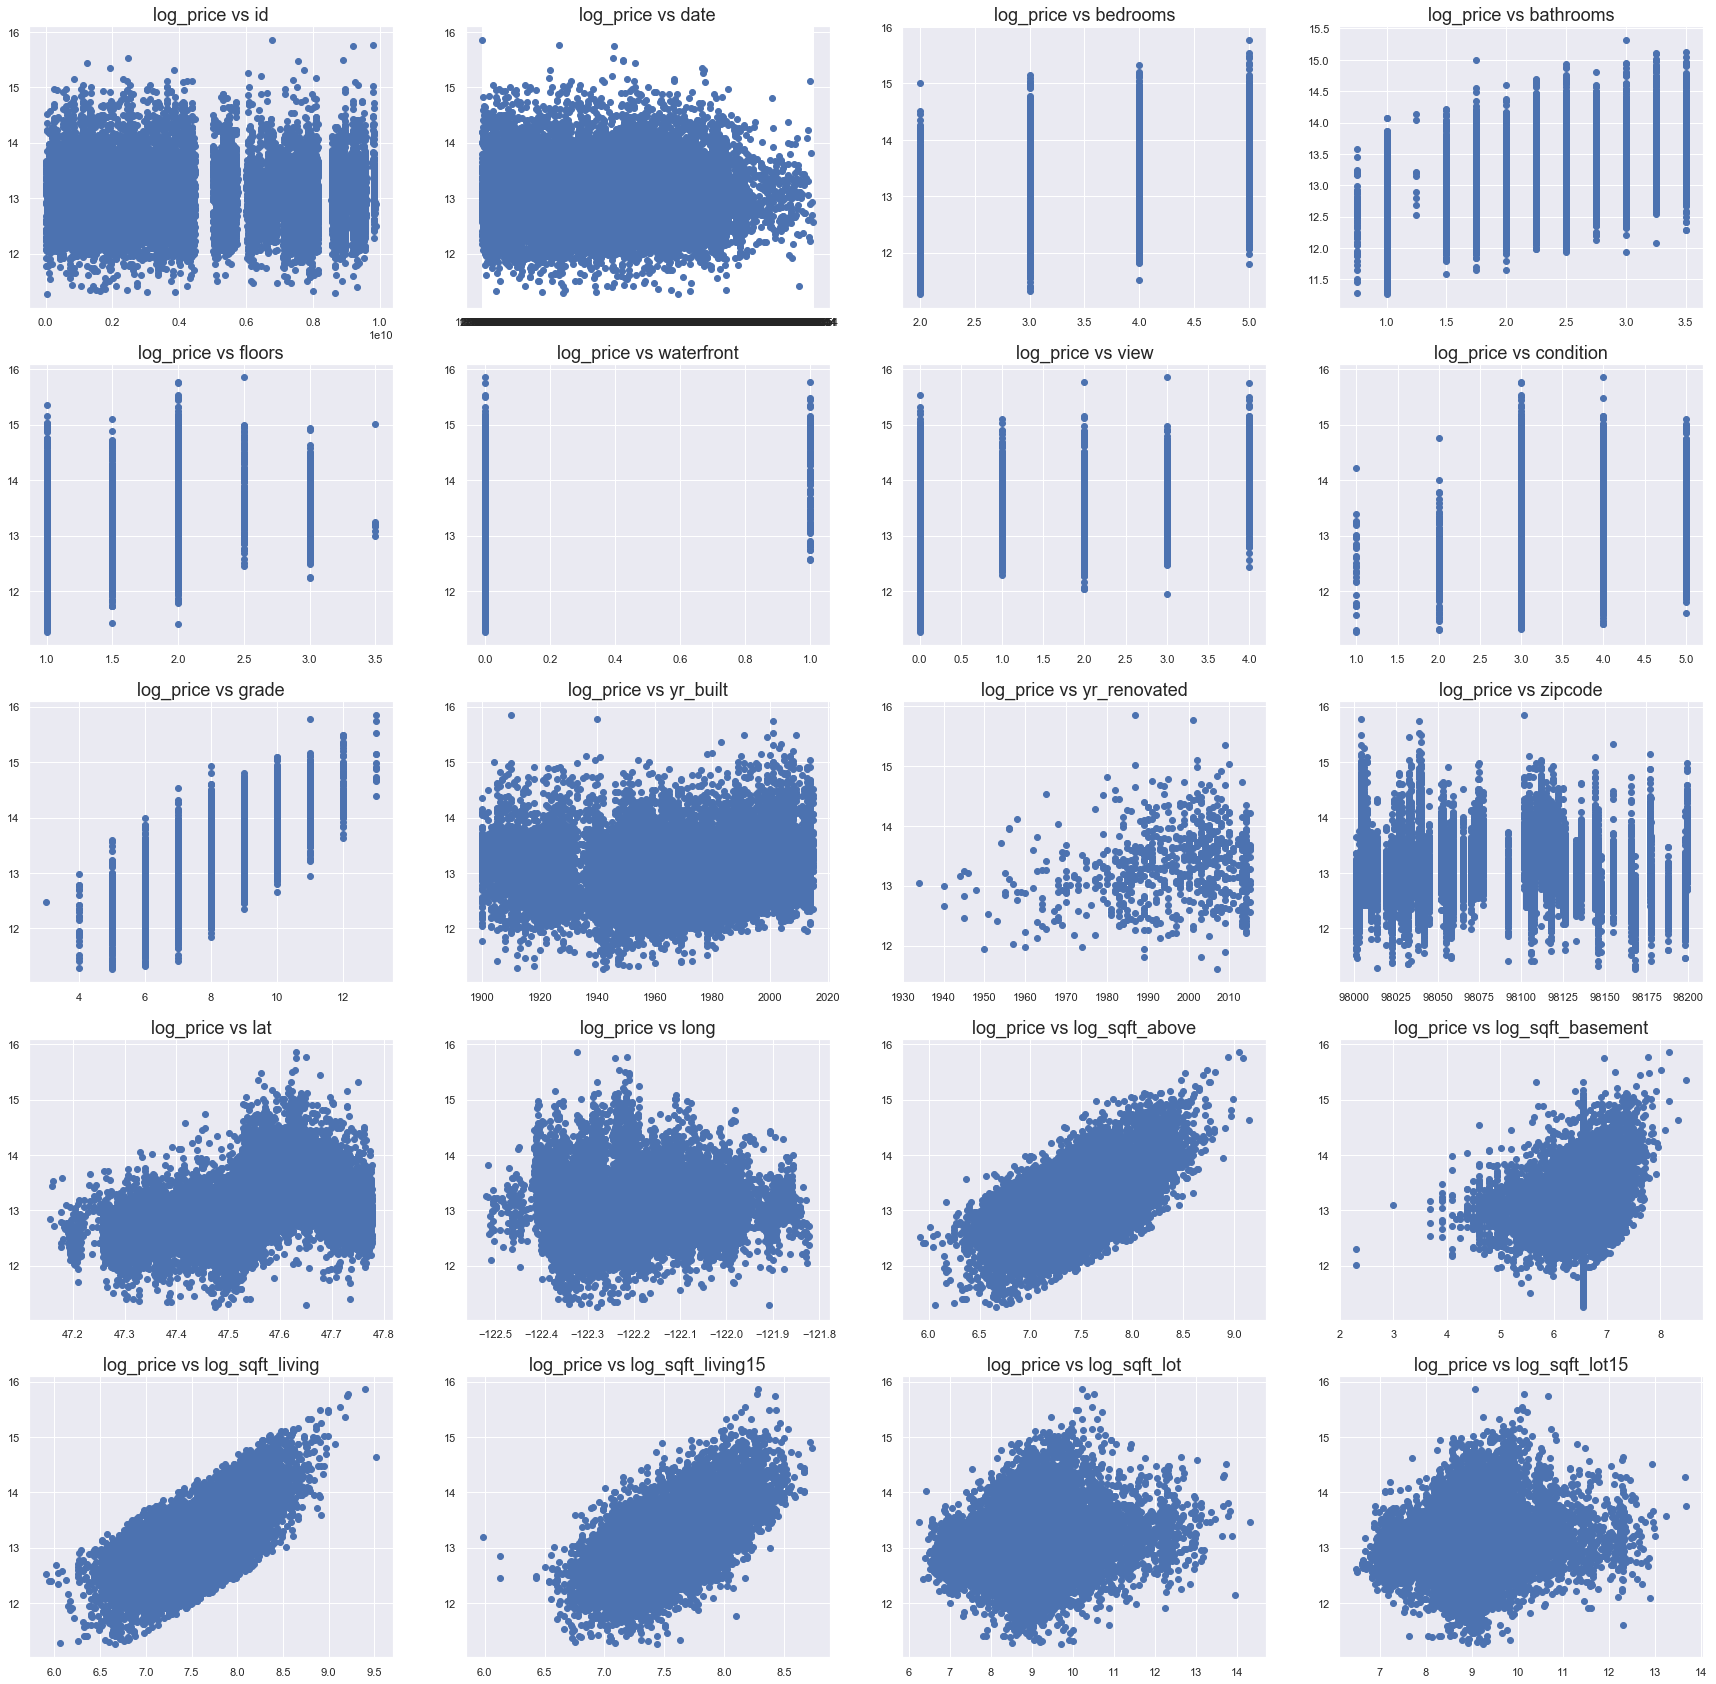

In [47]:
f.scatter_one_vs_all(transformed_df, 'log_price')

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x1a27a396d8>,
      dtype=object)

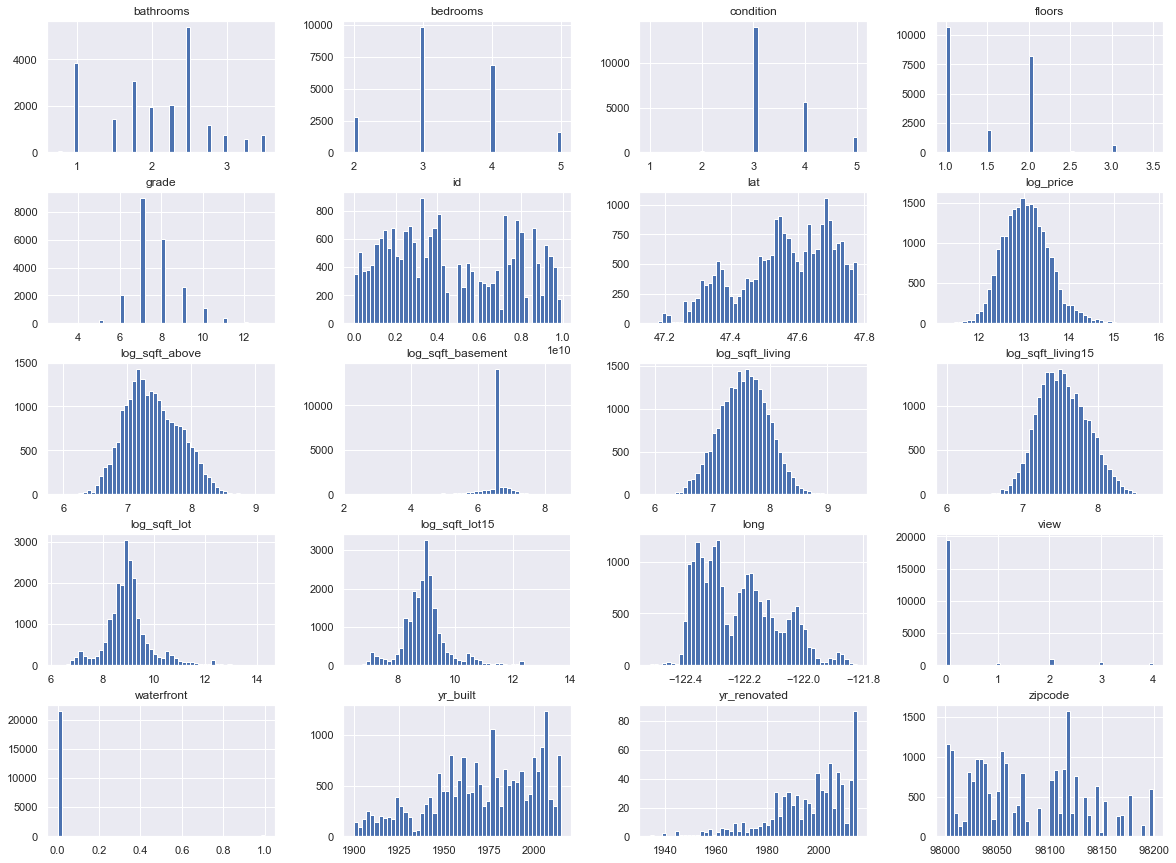

In [34]:
transformed_df.hist(bins=50, figsize=(20,15))